In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
import sklearn as sklearn
from sklearn.model_selection import train_test_split
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from sklearn import metrics

## 1. Preparando los datos

Llamaremos al DataFrame 'data' de momento.

In [6]:
data = pd.read_csv('https://github.com/anabautistamartin/capstonedatasci/files/8984239/dataset.csv', sep=';', header=None, decimal=',')

### Poniendo nombre a las columnas y reorganizándolas

Queremos que el DataFrame quede en el orden 'version', 'item', 'ms', 'lang', 'expo', 'pref', 'use', 'grupo', 'orden', 'contextlab1' y 'contextlab2'. 'Version', que es la versión del ítem (correcta o incorrecta) y lo que buscamos predecir, pasará a llamarse **'predict'**. 

In [7]:
data.columns = ['predict', 'item', 'ms', 'lang', 'expo', 'pref', 'use', 'profic', 'grupo', 'orden', 'contextlab1', 'contextlab2']
print(data)

      predict  item          ms  lang  expo  pref       use  profic  grupo  \
0           1    76  110.037736     0  0.90  0.50  0.875000   1.000      0   
1           1    76   92.905660     0  0.80  0.50  0.806250   0.900      0   
2           1    76   84.207547     0  0.50  0.60  0.912500   0.950      0   
3           1    76   63.169811     0  0.95  0.90  0.887500   0.900      0   
4           1    76   62.452830     0  0.60  0.70  0.787500   1.000      0   
...       ...   ...         ...   ...   ...   ...       ...     ...    ...   
7520        0    69   62.932584     1  0.45  0.35  0.361429   0.850      1   
7521        0    69  185.112360     1  0.02  0.30  0.050000   0.925      1   
7522        0    69  128.617977     1  0.10  0.40  0.014286   0.775      1   
7523        0    69   74.932584     1  0.60  0.60  0.556250   1.000      1   
7524        0    69   84.865169     1  0.30  0.25  0.234286   0.975      1   

      orden  contextlab1  contextlab2  
0         0            

### Haciendo one-hot-encoding de la columna 'item'

La variable 'item' es una variable categórica que indica, del 1 al 146, el número de ítem que lee el sujeto en cada ensayo, esto es, en cada línea del DataFrame. Para un procesamiento adecuado, esta variable se tiene que descomponer en variables dicotómicas con los valores 0 y 1. Generamos, entonces, un DataFrame que incluya todas las variables dicotómicas de 'item', llamado 'dataset'. 

In [8]:
dummies_item = pd.get_dummies(data['item'])

dataset = pd.merge(
    left=data,
    right=dummies_item,
    left_index=True,
    right_index=True,
)

del dataset['item']

print(dataset)

      predict          ms  lang  expo  pref       use  profic  grupo  orden  \
0           1  110.037736     0  0.90  0.50  0.875000   1.000      0      0   
1           1   92.905660     0  0.80  0.50  0.806250   0.900      0      0   
2           1   84.207547     0  0.50  0.60  0.912500   0.950      0      0   
3           1   63.169811     0  0.95  0.90  0.887500   0.900      0      0   
4           1   62.452830     0  0.60  0.70  0.787500   1.000      0      0   
...       ...         ...   ...   ...   ...       ...     ...    ...    ...   
7520        0   62.932584     1  0.45  0.35  0.361429   0.850      1      1   
7521        0  185.112360     1  0.02  0.30  0.050000   0.925      1      1   
7522        0  128.617977     1  0.10  0.40  0.014286   0.775      1      1   
7523        0   74.932584     1  0.60  0.60  0.556250   1.000      1      1   
7524        0   84.865169     1  0.30  0.25  0.234286   0.975      1      1   

      contextlab1  ...  136  137  138  140  141  14

### Eliminando las variables 'contextlab1' y 'contextlab2'

Eliminamos las variables referidas a la condición experimental 'contextlab1' y 'contextlab2' porque, junto a la variable que indica el número del ítem, codifican la versión de la oración que lee el sujeto. En otras palabras, la versión (correcta o incorrecta) de cada ítem que se presentaba a los participantes venía dada por la condición experimental. 

In [9]:
del dataset['contextlab1']
del dataset['contextlab2']
print(dataset)

      predict          ms  lang  expo  pref       use  profic  grupo  orden  \
0           1  110.037736     0  0.90  0.50  0.875000   1.000      0      0   
1           1   92.905660     0  0.80  0.50  0.806250   0.900      0      0   
2           1   84.207547     0  0.50  0.60  0.912500   0.950      0      0   
3           1   63.169811     0  0.95  0.90  0.887500   0.900      0      0   
4           1   62.452830     0  0.60  0.70  0.787500   1.000      0      0   
...       ...         ...   ...   ...   ...       ...     ...    ...    ...   
7520        0   62.932584     1  0.45  0.35  0.361429   0.850      1      1   
7521        0  185.112360     1  0.02  0.30  0.050000   0.925      1      1   
7522        0  128.617977     1  0.10  0.40  0.014286   0.775      1      1   
7523        0   74.932584     1  0.60  0.60  0.556250   1.000      1      1   
7524        0   84.865169     1  0.30  0.25  0.234286   0.975      1      1   

      1  ...  136  137  138  140  141  142  143  14

### Normalizando 'ms'

La variable 'ms' indica el tiempo de lectura del ítem en milisegundos en cada ensayo, ponderado según la longitud del ítem en número de caracteres. Esta variable tiene un rango diferente a las demás variables, y por eso procedemos a normalizarla.

In [10]:
dataset['ms'] = MinMaxScaler().fit_transform(np.array(dataset['ms']).reshape(-1,1)) 
  
print(dataset['ms'])
print(dataset)

0       0.227130
1       0.187630
2       0.167576
3       0.119072
4       0.117419
          ...   
7520    0.118525
7521    0.400220
7522    0.269968
7523    0.146192
7524    0.169092
Name: ms, Length: 7525, dtype: float64
      predict        ms  lang  expo  pref       use  profic  grupo  orden  1  \
0           1  0.227130     0  0.90  0.50  0.875000   1.000      0      0  0   
1           1  0.187630     0  0.80  0.50  0.806250   0.900      0      0  0   
2           1  0.167576     0  0.50  0.60  0.912500   0.950      0      0  0   
3           1  0.119072     0  0.95  0.90  0.887500   0.900      0      0  0   
4           1  0.117419     0  0.60  0.70  0.787500   1.000      0      0  0   
...       ...       ...   ...   ...   ...       ...     ...    ...    ... ..   
7520        0  0.118525     1  0.45  0.35  0.361429   0.850      1      1  0   
7521        0  0.400220     1  0.02  0.30  0.050000   0.925      1      1  0   
7522        0  0.269968     1  0.10  0.40  0.014286   

### Separando la variable a predecir

Queremos predecir la versión del ítem que se presenta en cada ensayo, que corresponde a la variable 'predict'. La separamos del resto del dataset bajo el nombre 'tags'.

In [11]:
tags = dataset["predict"]
print(tags)

variables = dataset
del variables['predict']
print(variables)

0       1
1       1
2       1
3       1
4       1
       ..
7520    0
7521    0
7522    0
7523    0
7524    0
Name: predict, Length: 7525, dtype: int64
            ms  lang  expo  pref       use  profic  grupo  orden  1  2  ...  \
0     0.227130     0  0.90  0.50  0.875000   1.000      0      0  0  0  ...   
1     0.187630     0  0.80  0.50  0.806250   0.900      0      0  0  0  ...   
2     0.167576     0  0.50  0.60  0.912500   0.950      0      0  0  0  ...   
3     0.119072     0  0.95  0.90  0.887500   0.900      0      0  0  0  ...   
4     0.117419     0  0.60  0.70  0.787500   1.000      0      0  0  0  ...   
...        ...   ...   ...   ...       ...     ...    ...    ... .. ..  ...   
7520  0.118525     1  0.45  0.35  0.361429   0.850      1      1  0  0  ...   
7521  0.400220     1  0.02  0.30  0.050000   0.925      1      1  0  0  ...   
7522  0.269968     1  0.10  0.40  0.014286   0.775      1      1  0  0  ...   
7523  0.146192     1  0.60  0.60  0.556250   1.000      1 

### Separando los sets de Train y Test

En este caso destinamos un 80% de los datos a entrenar el modelo, y un 20% a testarlo. Obtenemos así las variables X_train y y_train para entrenar el modelo, y las variables X_test y y_test para testarlo.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(variables, tags, test_size=0.2)

print(X_train)
print(X_test)
print(y_train)
print(y_test)
np.shape(X_train)

            ms  lang  expo  pref       use  profic  grupo  orden  1  2  ...  \
4504  0.221229     1  0.05  0.10  0.000000   0.925      1      0  0  0  ...   
3640  0.110558     0  0.60  0.80  0.762500   1.000      1      0  0  0  ...   
207   0.402552     0  0.80  0.90  0.825000   1.000      0      0  0  0  ...   
2580  0.123159     1  0.30  0.20  0.187500   0.875      1      0  0  0  ...   
5786  0.155662     1  0.40  0.50  0.637500   0.975      1      1  0  0  ...   
...        ...   ...   ...   ...       ...     ...    ...    ... .. ..  ...   
1323  0.065918     0  0.80  1.00  0.912500   1.000      0      0  0  0  ...   
1665  0.260119     0  0.60  0.50  0.712500   1.000      0      0  0  0  ...   
7101  0.163413     1  0.45  0.35  0.361429   0.850      1      1  0  0  ...   
351   0.301513     0  0.80  0.90  0.825000   1.000      0      0  0  0  ...   
3698  0.103077     0  0.80  0.20  0.631250   1.000      1      0  0  0  ...   

      136  137  138  140  141  142  143  144  145  

(6020, 153)

Vemos cuántas oraciones correctas hay en el set de test, para tenerlo en cuenta al interpretar la matriz de confusión.

In [19]:
suma = np.sum(y_test)
proporcion = suma/len(y_test)

print(f"El set de test contiene un {proporcion} de ensayos con oraciones correctas.")

El set de test contiene un 0.532890365448505 de ensayos con oraciones correctas.


### Convirtiendo las 'y' en categóricas

Convertimos las 'y', que son arrays con valores 0 y 1, en matrices bidimensiones.

In [20]:
num_classes=2
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

## 2. Implementando el modelo

### Construyendo el modelo

Construimos un modelo secuencial con 14 capas de neuronas densamente conectadas. Se incluye también un dropout del 20% de neuronas cada dos capas, para reducir el riesgo de overfitting del modelo. El input para que el modelo sea entrenado es el DataFrame desarrollado anteriormente, de 153 columnas. La última neurona del modelo tiene activación **softmax** puesto que la variable a predecir, la versión del ítem, es una variable categórica con dos clases (0 y 1). Se mide la adecuación del modelo en **accuracy**. 

In [21]:
model = Sequential() 
model.add(Dense(36, activation='relu', input_shape=(None,153)))
model.add(Dense(86, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(180, activation='relu'))
model.add(Dense(180, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(86, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary() 

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 36)          5544      
                                                                 
 dense_1 (Dense)             (None, None, 86)          3182      
                                                                 
 dropout (Dropout)           (None, None, 86)          0         
                                                                 
 dense_2 (Dense)             (None, None, 100)         8700      
                                                                 
 dense_3 (Dense)             (None, None, 100)         10100     
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 dense_4 (Dense)             (None, None, 120)         1

### Entrenando el modelo

Se entrena el modelo con un batch de 40 ejemplos, en 400 epochs. 

In [22]:
batch_size = 40
epochs = 400

history = model.fit(X_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=1, 
                    validation_data=(X_test, y_test))

Epoch 1/400
151/151 [==============================] - 2s 6ms/step - loss: 0.6286 - accuracy: 0.6194 - val_loss: 0.5926 - val_accuracy: 0.7076
Epoch 2/400
151/151 [==============================] - 1s 5ms/step - loss: 0.4055 - accuracy: 0.7774 - val_loss: 0.3361 - val_accuracy: 0.7794
Epoch 3/400
151/151 [==============================] - 1s 6ms/step - loss: 0.3246 - accuracy: 0.7990 - val_loss: 0.3317 - val_accuracy: 0.7854
Epoch 4/400
151/151 [==============================] - 1s 6ms/step - loss: 0.3096 - accuracy: 0.8071 - val_loss: 0.3306 - val_accuracy: 0.7854
Epoch 5/400
151/151 [==============================] - 1s 5ms/step - loss: 0.3093 - accuracy: 0.8056 - val_loss: 0.3251 - val_accuracy: 0.7860
Epoch 6/400
151/151 [==============================] - 1s 5ms/step - loss: 0.3049 - accuracy: 0.8053 - val_loss: 0.3269 - val_accuracy: 0.7854
Epoch 7/400
151/151 [==============================] - 1s 6ms/step - loss: 0.3116 - accuracy: 0.8040 - val_loss: 0.3300 - val_accuracy: 0.7854

Epoch 51/400
151/151 [==============================] - 1s 5ms/step - loss: 0.2279 - accuracy: 0.8777 - val_loss: 0.4081 - val_accuracy: 0.8027
Epoch 52/400
151/151 [==============================] - 1s 5ms/step - loss: 0.2286 - accuracy: 0.8769 - val_loss: 0.3525 - val_accuracy: 0.7967
Epoch 53/400
151/151 [==============================] - 1s 6ms/step - loss: 0.2179 - accuracy: 0.8860 - val_loss: 0.3779 - val_accuracy: 0.8020
Epoch 54/400
151/151 [==============================] - 1s 5ms/step - loss: 0.2190 - accuracy: 0.8794 - val_loss: 0.4363 - val_accuracy: 0.8066
Epoch 55/400
151/151 [==============================] - 1s 5ms/step - loss: 0.2205 - accuracy: 0.8817 - val_loss: 0.4597 - val_accuracy: 0.8086
Epoch 56/400
151/151 [==============================] - 1s 6ms/step - loss: 0.2160 - accuracy: 0.8846 - val_loss: 0.4082 - val_accuracy: 0.7894
Epoch 57/400
151/151 [==============================] - 1s 5ms/step - loss: 0.2069 - accuracy: 0.8865 - val_loss: 0.3664 - val_accuracy:

Epoch 108/400
151/151 [==============================] - 1s 4ms/step - loss: 0.1352 - accuracy: 0.9299 - val_loss: 0.6702 - val_accuracy: 0.8186
Epoch 109/400
151/151 [==============================] - 1s 4ms/step - loss: 0.1421 - accuracy: 0.9311 - val_loss: 0.8372 - val_accuracy: 0.8199
Epoch 110/400
151/151 [==============================] - 1s 5ms/step - loss: 0.1355 - accuracy: 0.9350 - val_loss: 0.9269 - val_accuracy: 0.8179
Epoch 111/400
151/151 [==============================] - 1s 6ms/step - loss: 0.1257 - accuracy: 0.9390 - val_loss: 0.7675 - val_accuracy: 0.8133
Epoch 112/400
151/151 [==============================] - 1s 7ms/step - loss: 0.1325 - accuracy: 0.9357 - val_loss: 1.0010 - val_accuracy: 0.8113
Epoch 113/400
151/151 [==============================] - 1s 6ms/step - loss: 0.1244 - accuracy: 0.9394 - val_loss: 0.7093 - val_accuracy: 0.8199
Epoch 114/400
151/151 [==============================] - 1s 5ms/step - loss: 0.1284 - accuracy: 0.9385 - val_loss: 1.0305 - val_ac

151/151 [==============================] - 1s 7ms/step - loss: 0.0586 - accuracy: 0.9757 - val_loss: 0.9133 - val_accuracy: 0.8518
Epoch 221/400
151/151 [==============================] - 1s 7ms/step - loss: 0.0540 - accuracy: 0.9792 - val_loss: 0.9718 - val_accuracy: 0.8465
Epoch 222/400
151/151 [==============================] - 1s 5ms/step - loss: 0.0513 - accuracy: 0.9784 - val_loss: 1.1621 - val_accuracy: 0.8485
Epoch 223/400
151/151 [==============================] - 1s 6ms/step - loss: 0.0555 - accuracy: 0.9751 - val_loss: 1.1818 - val_accuracy: 0.8485
Epoch 224/400
151/151 [==============================] - 1s 4ms/step - loss: 0.0598 - accuracy: 0.9738 - val_loss: 0.9722 - val_accuracy: 0.8505
Epoch 225/400
151/151 [==============================] - 1s 5ms/step - loss: 0.0630 - accuracy: 0.9738 - val_loss: 0.7974 - val_accuracy: 0.8425
Epoch 226/400
151/151 [==============================] - 1s 6ms/step - loss: 0.0707 - accuracy: 0.9711 - val_loss: 0.7852 - val_accuracy: 0.8518

151/151 [==============================] - 1s 5ms/step - loss: 0.0316 - accuracy: 0.9875 - val_loss: 1.6123 - val_accuracy: 0.8738
Epoch 333/400
151/151 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9870 - val_loss: 1.3956 - val_accuracy: 0.8664
Epoch 334/400
151/151 [==============================] - 1s 6ms/step - loss: 0.0424 - accuracy: 0.9822 - val_loss: 0.8273 - val_accuracy: 0.8611
Epoch 335/400
151/151 [==============================] - 1s 6ms/step - loss: 0.0342 - accuracy: 0.9869 - val_loss: 1.4385 - val_accuracy: 0.8684
Epoch 336/400
151/151 [==============================] - 1s 5ms/step - loss: 0.0447 - accuracy: 0.9831 - val_loss: 1.4150 - val_accuracy: 0.8698
Epoch 337/400
151/151 [==============================] - 1s 5ms/step - loss: 0.0398 - accuracy: 0.9880 - val_loss: 0.8618 - val_accuracy: 0.8664
Epoch 338/400
151/151 [==============================] - 1s 4ms/step - loss: 0.0378 - accuracy: 0.9836 - val_loss: 1.0537 - val_accuracy: 0.8658

### Evaluando el modelo

Se evalúa el modelo en la pérdida (i.e., loss) y precisión (i.e., accuracy) final.

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0844417810440063
Test accuracy: 0.8750830292701721


Visualizamos también el aumento en la precisión y la reducción de la pérdida a través de los epochs.

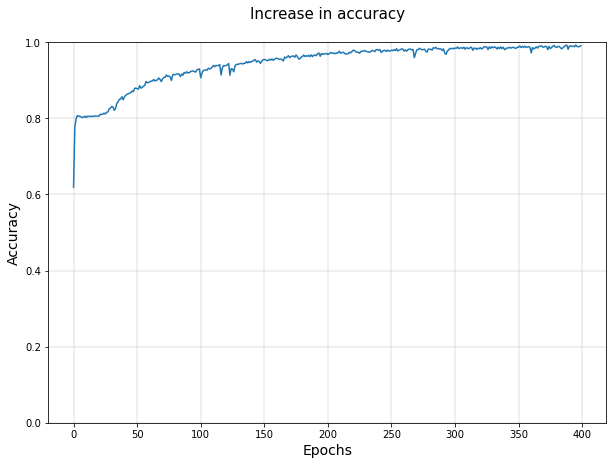

In [25]:
plt.figure(figsize=[10,7])
plt.title('Increase in accuracy\n', fontsize =15)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.ylim([0,1])
plt.grid(linewidth=0.4)
plt.plot(history.history['accuracy'])
plt.show()

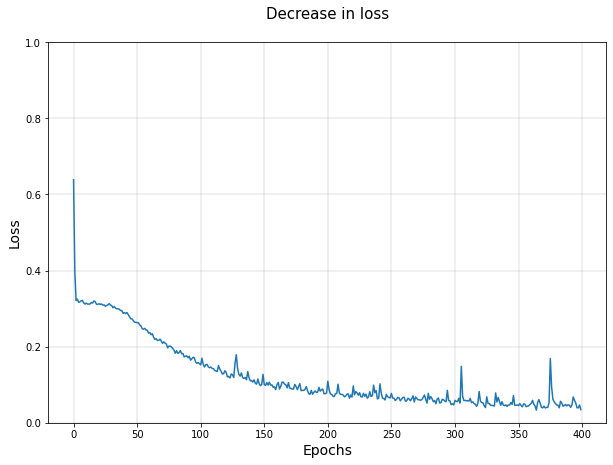

In [127]:
plt.figure(figsize=[10,7])
plt.title('Decrease in loss\n', fontsize =15)
plt.ylabel('Loss',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.ylim([0,1])
plt.grid(linewidth=0.4)
plt.plot(history.history['loss'])
plt.show()

Visualizamos también cómo de adecuada es la clasificación en una matriz de confusión.

Classification accuracy: 0.8750830564784053
Details for the confusion matrix: [[581 122]
 [ 66 736]]
Confusion matrix: None


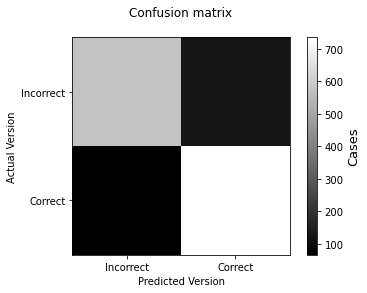

In [26]:
y_pred = model.predict(X_test)

# Making 'y' a binary vector again 
y_testbinary = y_test.argmax(axis=1)
y_predbinary = y_pred.argmax(axis=1)

def plot_confusion_matrix(a, b):
    plt.imshow(metrics.confusion_matrix(a, b),
               cmap=plt.cm.gray, interpolation='nearest')
    cbar = plt.colorbar()
    plt.title('Confusion matrix\n');
    plt.xlabel('Predicted Version');
    plt.ylabel('Actual Version');
    plt.xticks([0, 1], ['Incorrect','Correct'])
    plt.yticks([0, 1], ['Incorrect','Correct'])
    cbar.set_label('Cases', rotation=90,fontsize=13)

def details_confusion_matrix(a,b):
    details = metrics.confusion_matrix(a,b)
    return details

print ("Classification accuracy:", metrics.accuracy_score(y_testbinary, y_predbinary))
print("Details for the confusion matrix:", details_confusion_matrix(y_testbinary, y_predbinary))
print("Confusion matrix:", plot_confusion_matrix(y_testbinary, y_predbinary))

## 3. Prediciendo ilusiones

Hasta ahora se ha construido un modelo que funciona adecuadamente para clasificar si el ítem que lee un individuo se ha presentado en su versión correcta o incorrecta. Sin embargo, los datos con los que hemos entrenado el modelo son ensayos en los que los individuos conocen si el ítem es correcto o incorrecto, y además responden correctamente. 

Sin embargo, una parte importante de los resultados de la investigación original corresponde a los ensayos en los que se dan las ilusiones semánticas. Estas ilusiones suponen un error sistemático de los participantes, al contestar que oraciones incorrectas son correctas (e.g., Moisés llevó dos animales de cada tipo en el arca). Para observar si el modelo elaborado sirve como medida de integración semántica, debería hacer predicciones sistemáticamente erróneas para estos ensayos. Es decir, los debería clasificar como 'correctos', pues los sujetos de esos ensayos los han integrado como semánticamente coherentes. 

### Abriendo los datos

Empleamos ahora los datos de los ensayos en los que sucedió la ilusión semántica, es decir, ensayos en los que los sujetos respondieron que oraciones incorrectas eran correctas. Los guardamos bajo un DataFrame denominado 'dataillusions'. 

In [27]:
dataillusions = pd.read_csv('https://github.com/anabautistamartin/capstonedatasci/files/8984240/datasetillusions.csv',sep=';',header=None, decimal=',')

dataillusions.columns = ['predict', 'ms', 'lang', 'expo', 'pref', 'use', 'profic', 'grupo', 'orden', 'item']
print(dataillusions)

     predict          ms  lang  expo  pref       use  profic  grupo  orden  \
0          0   48.446809     0  1.00  1.00  0.912500   0.875      0      0   
1          0   61.380952     0  0.20  0.80  0.468750   1.000      0      0   
2          0   66.785714     0  0.80  0.50  0.756250   0.975      0      0   
3          0  128.047619     0  0.60  0.50  0.712500   1.000      0      0   
4          0   84.190476     0  0.80  0.85  0.862500   0.975      0      0   
..       ...         ...   ...   ...   ...       ...     ...    ...    ...   
496        0   65.835052     0  0.25  0.30  0.206250   1.000      1      1   
497        0  107.049180     0  0.65  0.45  0.614286   0.775      1      1   
498        0   61.520408     1  0.40  0.30  0.350000   0.950      1      0   
499        0   86.462963     1  0.05  0.10  0.000000   0.925      1      0   
500        0   85.296296     1  0.00  0.50  0.002500   0.850      1      1   

     item  
0       1  
1       1  
2       1  
3       1  
4  

### Haciendo one-hot-encoding de la columna 'item'

In [28]:
dummies_item = pd.get_dummies(dataillusions['item'])
print(dummies_item)

datasetillusions = pd.merge(
    left=dataillusions,
    right=dummies_item,
    left_index=True,
    right_index=True,
)

del datasetillusions['item']

print(datasetillusions)

     1   2   3   4   5   6   7   8   9   11  ...  64  66  67  68  69  70  71  \
0     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4     1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
496   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
497   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
498   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
499   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
500   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

     72  73  74  
0     0   0   0  
1  

### Normalizando 'ms'

In [29]:
datasetillusions['ms'] = MinMaxScaler().fit_transform(np.array(datasetillusions['ms']).reshape(-1,1)) 
  
print(datasetillusions['ms'])
print(datasetillusions)

0      0.122195
1      0.172196
2      0.193089
3      0.429913
4      0.260372
         ...   
496    0.189414
497    0.348738
498    0.172735
499    0.269157
500    0.264647
Name: ms, Length: 501, dtype: float64
     predict        ms  lang  expo  pref       use  profic  grupo  orden  1  \
0          0  0.122195     0  1.00  1.00  0.912500   0.875      0      0  1   
1          0  0.172196     0  0.20  0.80  0.468750   1.000      0      0  1   
2          0  0.193089     0  0.80  0.50  0.756250   0.975      0      0  1   
3          0  0.429913     0  0.60  0.50  0.712500   1.000      0      0  1   
4          0  0.260372     0  0.80  0.85  0.862500   0.975      0      0  1   
..       ...       ...   ...   ...   ...       ...     ...    ...    ... ..   
496        0  0.189414     0  0.25  0.30  0.206250   1.000      1      1  0   
497        0  0.348738     0  0.65  0.45  0.614286   0.775      1      1  0   
498        0  0.172735     1  0.40  0.30  0.350000   0.950      1      0  0

### Separando la variable a predecir

In [30]:
tagsillusions = datasetillusions["predict"]
print(tagsillusions)

variablesillusions = datasetillusions
del variablesillusions['predict']
print(variablesillusions)

0      0
1      0
2      0
3      0
4      0
      ..
496    0
497    0
498    0
499    0
500    0
Name: predict, Length: 501, dtype: int64
           ms  lang  expo  pref       use  profic  grupo  orden  1  2  ...  \
0    0.122195     0  1.00  1.00  0.912500   0.875      0      0  1  0  ...   
1    0.172196     0  0.20  0.80  0.468750   1.000      0      0  1  0  ...   
2    0.193089     0  0.80  0.50  0.756250   0.975      0      0  1  0  ...   
3    0.429913     0  0.60  0.50  0.712500   1.000      0      0  1  0  ...   
4    0.260372     0  0.80  0.85  0.862500   0.975      0      0  1  0  ...   
..        ...   ...   ...   ...       ...     ...    ...    ... .. ..  ...   
496  0.189414     0  0.25  0.30  0.206250   1.000      1      1  0  0  ...   
497  0.348738     0  0.65  0.45  0.614286   0.775      1      1  0  0  ...   
498  0.172735     1  0.40  0.30  0.350000   0.950      1      0  0  0  ...   
499  0.269157     1  0.05  0.10  0.000000   0.925      1      0  0  0  ...   
50

### Añadiendo columnas para conseguir el size que admite el modelo

Los datos de los ensayos en los que se tiene la ilusión se refieren sólo a los primeros 74 ítems de los 146 iniciales; en el resto de ítems no hubo ninguna ilusión. Añadimos columnas para alcanzar las 146 columnas del one-hot-encoding de los datos con los que se entrenó el modelo. 

In [31]:
for i in range(74, 148):
    variablesillusions[f'{i}']=0
print(variablesillusions)

           ms  lang  expo  pref       use  profic  grupo  orden  1  2  ...  \
0    0.122195     0  1.00  1.00  0.912500   0.875      0      0  1  0  ...   
1    0.172196     0  0.20  0.80  0.468750   1.000      0      0  1  0  ...   
2    0.193089     0  0.80  0.50  0.756250   0.975      0      0  1  0  ...   
3    0.429913     0  0.60  0.50  0.712500   1.000      0      0  1  0  ...   
4    0.260372     0  0.80  0.85  0.862500   0.975      0      0  1  0  ...   
..        ...   ...   ...   ...       ...     ...    ...    ... .. ..  ...   
496  0.189414     0  0.25  0.30  0.206250   1.000      1      1  0  0  ...   
497  0.348738     0  0.65  0.45  0.614286   0.775      1      1  0  0  ...   
498  0.172735     1  0.40  0.30  0.350000   0.950      1      0  0  0  ...   
499  0.269157     1  0.05  0.10  0.000000   0.925      1      0  0  0  ...   
500  0.264647     1  0.00  0.50  0.002500   0.850      1      1  0  0  ...   

     138  139  140  141  142  143  144  145  146  147  
0      

### Creando predicciones para las ilusiones

In [32]:
y_predillusions = model.predict(variablesillusions)

# Making predicted 'y' a binary vector again 
y_predillusionsbinary = y_predillusions.argmax(axis=1)
print(y_predillusionsbinary)

[0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0
 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 0 0 0 0 0 0 0 0 1 0 

### Evaluando las predicciones

Evaluamos las predicciones del modelo para estos datos de ensayos con ilusiones semánticas mediante la accuracy y una matriz de confusión.

Classification accuracy: 0.3912175648702595
Confusion matrix: None
Details for the confusion matrix: [[196 305]
 [  0   0]]


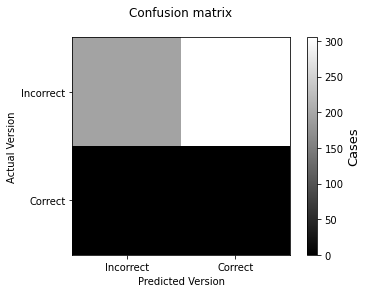

In [33]:
print("Classification accuracy:", metrics.accuracy_score(tagsillusions, y_predillusionsbinary))
print("Confusion matrix:", plot_confusion_matrix(tagsillusions, y_predillusionsbinary))
print("Details for the confusion matrix:", details_confusion_matrix(tagsillusions, y_predillusionsbinary))

## 4. Conclusiones

En este problema hemos intentado crear un clasificador que distinguiera ensayos en los que se presenta la versión correcta de una oración, y ensayos en los que se presenta la versión incorrecta. El modelo elaborado ha alcanzado una precisión de aproximadamente 0,88. Este resultado indica que el modelo puede predecir apropiadamente si una oración presentada a un sujeto es correcta o incorrecta, teniendo en cuenta el ítem leído, el tiempo de lectura del sujeto, sus variables sociolingüísticas en la lengua en la que se lee, y otras variables que discriminan el grupo al que pertenece el participante.

Sin embargo, el objetivo inicial de este problema no era clasificar la coherencia semántica absoluta, sino la integración semántica que realiza cada individuo. En este sentido, los ensayos en los que aparecían ilusiones semánticas son extremadamente útiles. El modelo construido tuvo una precisión de aproximadamente 0,40 para esos ensayos, lo que indica que comete un error notable en línea con los resultados esperados. Sin embargo, se esperaría que clasificase esos ensayos como 'correctos', pues es el juicio semántico que hacen los sujetos, y no ocurre así para todos los casos.